### Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

### Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

### Dictionary
#### Demographic:
• Sex: male or female(Nominal) <br>
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) <br>
##### Behavioral<br>
• Current Smoker: whether or not the patient is a current smoker (Nominal) <br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) <br>
##### Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal) <br>
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) <br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) <br>
• Diabetes: whether or not the patient had diabetes (Nominal) <br>
##### Medical(current) <br>
• Tot Chol: total cholesterol level (Continuous) <br>
• Sys BP: systolic blood pressure (Continuous) <br>
• Dia BP: diastolic blood pressure (Continuous) <br>
• BMI: Body Mass Index (Continuous) <br>
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) <br>
• Glucose: glucose level (Continuous) <br>
##### Predict variable (desired target) <br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) <br>

#### Data base available at https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

### <span style="color:#f55a42">It is important to keep in mind that the problem that we'll try to solve is difficult since we are trying to predict a health condition 10 years ahead.</span>

In [1]:
# Libraries for data analysis and visualization. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
%matplotlib inline

In [2]:
df = pd.read_csv("framingham.csv").drop_duplicates()

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.9 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


## We have some missing data and wrong data types
#### We will deal with the missing data in the model creation part - because we want to avoid information leak

### Changing data types

In [6]:
cat_var = ["male", "education", "currentSmoker","BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "TenYearCHD"]
quant_var = ["cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

In [7]:
for col in cat_var:
    df[col] = df[col].astype('category')

#### Our target variable is imbalanced. Another problem for the machine learning part

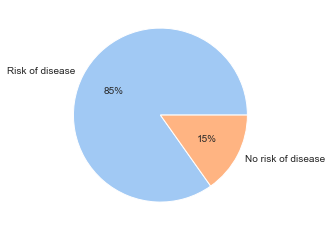

In [8]:
plt.pie(
    df["TenYearCHD"].value_counts(normalize=True),
    labels=['Risk of disease', 'No risk of disease'],
    colors= sns.color_palette('pastel')[:2],
    autopct='%.0f%%'
    )
plt.show()

## Checking our missing data proportion

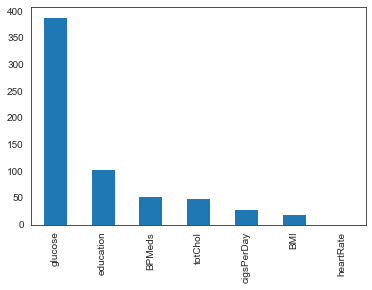

In [9]:
(df.isna()
 .sum()
 .sort_values(ascending=False)
 .where(lambda x: x>0)
 .dropna()
 .plot(kind='bar')
)
plt.show()

## Plotting a violinplot we can observe the distribution of the variables

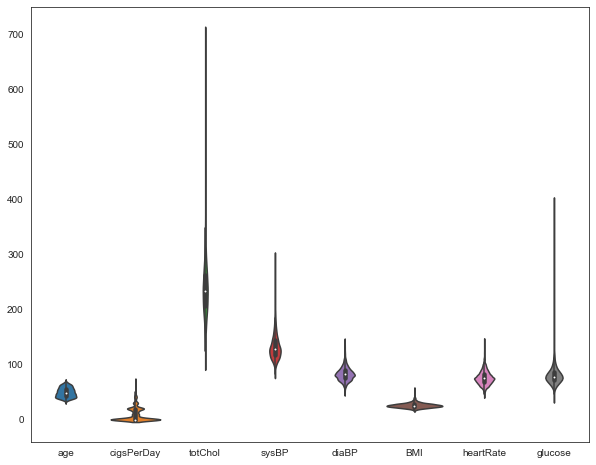

In [10]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df)
plt.show()

### Looking at a pairwise graph, we can see the relationship between the variables. More than that, we can color the dots that represent a person with a positive value in our target variable.

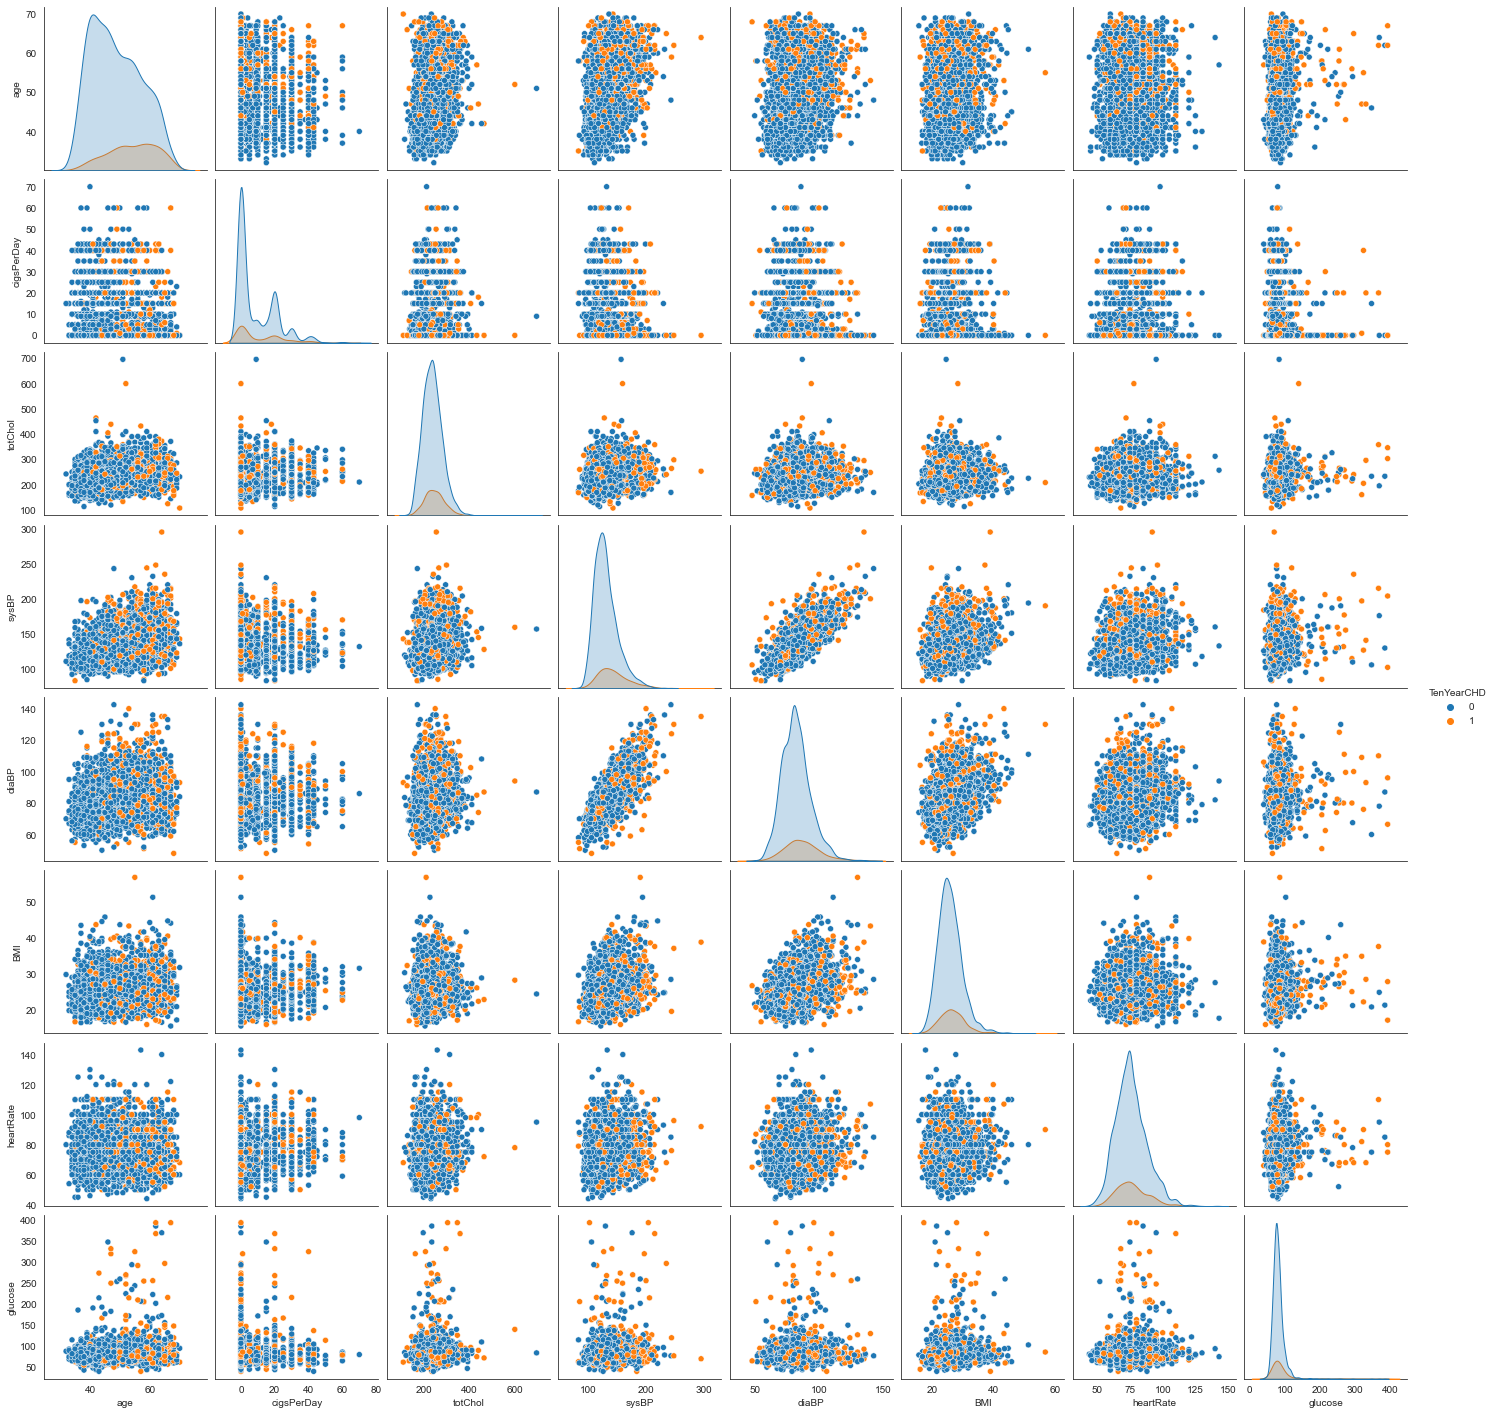

In [11]:
sns.pairplot(
    df,
    hue='TenYearCHD', 
    kind='scatter',
    diag_kind='kde')

plt.show()

It is possible to observe that the older the age, the higher the probability of observing a positive case - heart disease.<br>
Observing the first graph (age distribution), the median age of people with high risk is higher than those without this condition

### Correlation - shows the linear strengh between two quantitative variables

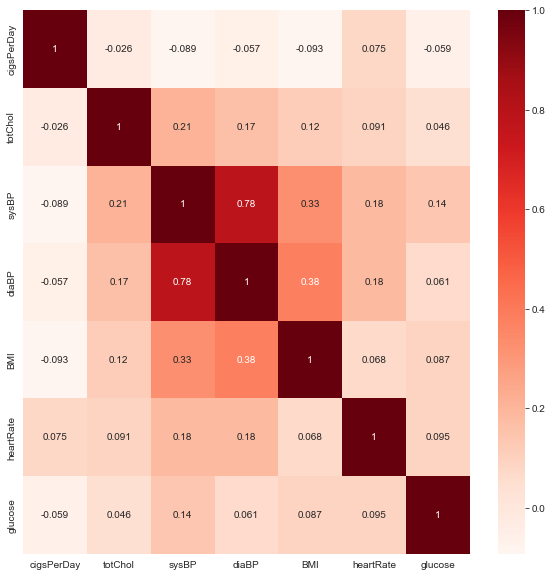

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df[quant_var].corr(),
            annot=True,
            cmap='Reds')
plt.show()

We have a strong correlation between sysBP and diaBP which makes total sense since both measures heart pressure

### Information Value - an useful metric for determining how good one variable is at predicting another (in this case our target variable)

| Information Value |   Variable Predictiveness   |
|:-----------------:|:---------------------------:|
| Less than 0.02    | Not useful for prediction   |
| 0.02 to 0.1       | Weak predictive Power       |
| 0.1 to 0.3        | Medium predictive Power     |
| 0.3 to 0.5        | Strong predictive Power     |
| >0.5              | Suspicious Predictive Power |

In [13]:
def information_value(var, target, bins=20):
    
    if var.dtype == 'category':
        temp_df = (pd.crosstab(var, target, normalize='columns')
              .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
              .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0])))
              .filter(['iv'])
              .iloc[0][0])
    else:
        temp_df = (pd.crosstab(
              pd.qcut(var, 10, duplicates='drop'),
                target, normalize='columns')
              .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
              .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0])))
              .filter(['iv'])
              .iloc[0][0])
    
    return temp_df

In [14]:
iv_dict = {'Variable':[], 'Information Value':[]}
for col in df.drop('TenYearCHD', axis=1).columns:
    iv = information_value(df[col], df['TenYearCHD'])
    iv_dict['Variable'].append(col)
    iv_dict['Information Value'].append(iv)
    
    
iv_df = pd.DataFrame(iv_dict).sort_values(by='Information Value', ascending=False).reset_index(drop=True)
iv_df

,Variable,Information Value
0,age,0.449248
1,sysBP,0.320049
2,prevalentHyp,0.225336
3,diaBP,0.188830
4,totChol,0.075561
5,education,0.060066
6,male,0.059957
7,BMI,0.056323
8,diabetes,0.052304
9,glucose,0.048166


# Building the ML Model

In [31]:
import warnings
warnings.filterwarnings("ignore") # ignore convergence warnings

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectPercentile
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import itertools

#### Splitting our independent variables from the dependent

In [16]:
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]

In [17]:
# Note: I have tested a lot column combinations and i couldn't improve the performance compared to using all the columns.

# cols_to_keep = ['age', 'sysBP', 'prevalentHyp', 'diaBP', 'male', 'totChol']
# X = X[cols_to_keep]

#### We'll split our data into train and test set BEFORE imputing missing values and balancing our minor class - otherwise we would <u>leak</u> information from the test set into our training data and our performance would be artificially better

Stratification of column Y will keep the original distribution of the target classes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

#### Now we are going to create a wrapper function that will perform all the necessary transformations on the data (impute missing data, supersampling the smaller class with SMOTE and scaling the data).
#### In addition, it will receive an algorithm and a metric to optimize and will do a GridSearch with Stratified Cross Validation to tune the hyperparameters for the chosen metric. <span style="color:#f55a42">Every transformation is done within a pipeline to prevent data leakage to the validation data</span>

In [19]:
def train_model(algorithm, grid_params={}, metric='recall',
              X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    global cat_var, quant_var
    
    
    cat_var_model = [i for i in X_train.columns if i in cat_var]
    quant_var_model = [i for i in X_train.columns if i in quant_var]
    
    name = 'algorithm'
    if grid_params:
        # Necessary for the imbpipeline
        grid_params = {name + '__' + k : v for k,v in grid_params.items() if name + '__' not in k}
        
    column_transformer = ColumnTransformer(transformers =[
                            ('cat', SimpleImputer(missing_values=np.nan, strategy ='most_frequent'), cat_var_model),
                            ('num', SimpleImputer(missing_values=np.nan, strategy ='median'), quant_var_model),
                            ],
                                           remainder ='passthrough')    
    
    
    folds = StratifiedKFold(shuffle=True, n_splits=4, random_state=42)
    
    # Note: You can't use SMOTE inside a standard sklearn Pipeline.
    pipe = imbpipeline(
                steps=[('imputer', column_transformer),
                       ('smote', SMOTE(random_state=0)),
                       ('scaler', StandardScaler()),
                       #('feature_selection', SelectPercentile(percentile=10)), # have tested many feature selection methods
                       (name, algorithm),
                      ])      
    
    model = GridSearchCV(
                         estimator=pipe,
                         param_grid=grid_params,
                         scoring=metric,
                         cv=folds,
                         n_jobs=-1,
                        )

    model.fit(X_train, y_train)

    return model

In [20]:
def plot_confusion_matrix(matrix):
    
    # Confusion matrix for binary data
    tags = ['True Neg','False Pos','False Neg','True Pos']
    labels = [f'{tag}\n{value}' for tag, value in zip(tags, matrix.ravel())]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matrix, annot=labels, cmap='Blues', fmt='')
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Original', fontsize=10)
    
    plt.show()

In [21]:
def evaluate_model(model, X_test=X_test, y_test=y_test):
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    plot_confusion_matrix(cm)

    print(f'Recall Score on Dev Set: {model.best_score_}')
    print(f'Recall Score on Test Set: {recall_score(y_test, prediction)}')
    print(f'{model.best_params_}')

#### One of the most important parts when we create a machine learning model is to define the <u>metric</u> that we want to optimize.
Since our problem is about health our classes don't have the same importance (It is not as harmful to predict that someone is at risk when they are not, compared to predicting that someone is not at risk when in fact they are) and our test data is imbalanced so we <span style="color:#f55a42">shouldn't use accuracy as a metric to evaluate performance</span><br>
So we need a metric that reduces the false negative and works on imbalanced data so lets go with <span style="color:#1e1ee6">Recall</span>

### Lets first test a Dummy Classifier that only predicts the most frequent class to have a base line to our models performance

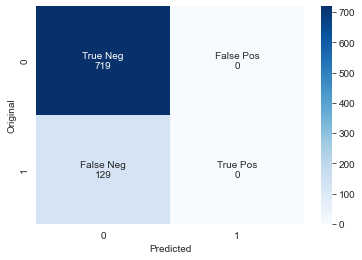

Recall Score: 0.0


In [22]:
dummy = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_pred = dummy.predict(X_test)
dummy_cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(dummy_cm)
print(f'Recall Score: {recall_score(y_test, y_pred)}')

### Now lets test a bunch of classifiers and see their recall performance

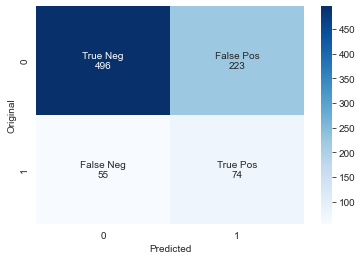

Recall Score on Dev Set: 0.671875
Recall Score on Test Set: 0.5736434108527132
{'algorithm__C': 0.01}


In [23]:
logistic = train_model(LogisticRegression(n_jobs=-1, max_iter=1000),
                       grid_params={
                                    'C':[i for i in np.logspace(-4, 4, 9)],
                                   }, metric='recall')

evaluate_model(logistic)

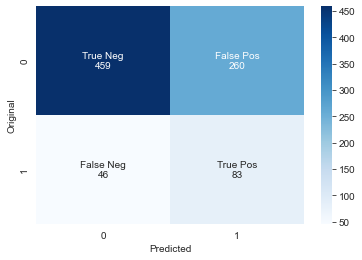

Recall Score on Dev Set: 0.6815649224806202
Recall Score on Test Set: 0.6434108527131783
{'algorithm__n_neighbors': 108, 'algorithm__weights': 'uniform'}


In [24]:
knn = train_model(KNeighborsClassifier(n_jobs=-1),
                    grid_params={'n_neighbors':[i*2 for i in range(1,70)],
                                'weights':['uniform', 'distance']}, metric='recall')

evaluate_model(knn)

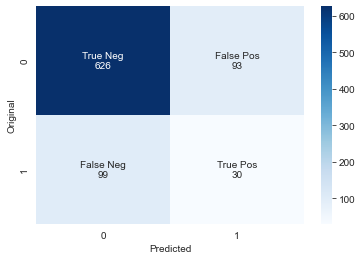

Recall Score on Dev Set: 0.36312984496124034
Recall Score on Test Set: 0.23255813953488372
{}


In [25]:
naive_bayes = train_model(GaussianNB(), metric='recall')
evaluate_model(naive_bayes)

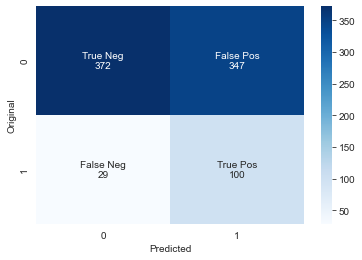

Recall Score on Dev Set: 0.7961936773255814
Recall Score on Test Set: 0.7751937984496124
{'algorithm__C': 1e-06, 'algorithm__gamma': 0.1}


In [26]:
svm = train_model(SVC(),
                grid_params={
                            'C':[i for i in np.logspace(-6, 0, 7)],
                            'gamma':[i for i in np.logspace(-6, 0, 7)],
                            }, metric='recall')

evaluate_model(svm)

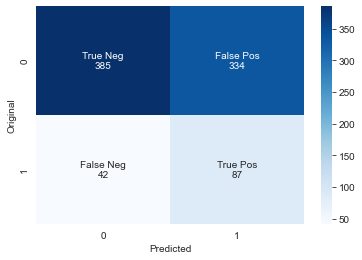

Recall Score on Dev Set: 0.7981316618217055
Recall Score on Test Set: 0.6744186046511628
{'algorithm__learning_rate': 1e-06, 'algorithm__n_estimators': 100}


In [27]:
ada = train_model(AdaBoostClassifier(random_state=42),
                grid_params={
                            'learning_rate':[i for i in np.logspace(-6, 0, 7)],
                            'n_estimators':[int(n) for n in np.linspace(100, 300, 5)],
                            }, metric='recall')

evaluate_model(ada)

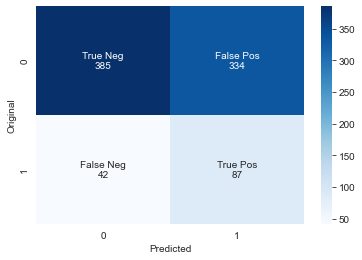

Recall Score on Dev Set: 0.7981316618217055
Recall Score on Test Set: 0.6744186046511628
{'algorithm__learning_rate': 1e-06, 'algorithm__max_depth': 1, 'algorithm__n_estimators': 20}


In [28]:
xgb = train_model(XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
                grid_params={
                            'learning_rate':[i for i in np.logspace(-6, 0, 7)],
                            'n_estimators':[int(n) for n in np.linspace(20, 300, 8)],
                            'max_depth':[int(n) for n in np.linspace(1, 20, 4)],
                            }, metric='recall')

evaluate_model(xgb)

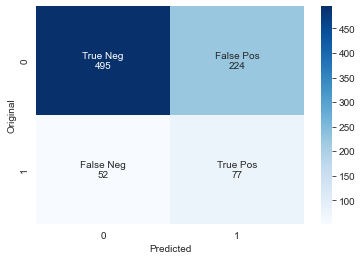

Recall Score on Dev Set: 0.6332061531007752
Recall Score on Test Set: 0.5968992248062015
{'algorithm__max_depth': 1, 'algorithm__n_estimators': 132}


In [29]:
forest = train_model(RandomForestClassifier(criterion='entropy'),
                grid_params={
                    'n_estimators':[int(n) for n in np.linspace(20, 300, 6)],
                    'max_depth':[int(n) for n in np.linspace(1, 30, 6)],
                }, metric='recall')

evaluate_model(forest)

### AdaBoost and XGBoost have the same performance (both are based on trees methods). Let's try to pick the 3 best models and ensemble them into a VotingClassifier that will decide based on the summed probabilities of all classifiers. We will exclude XGBoost because it created the same tree model as AdaBoost 

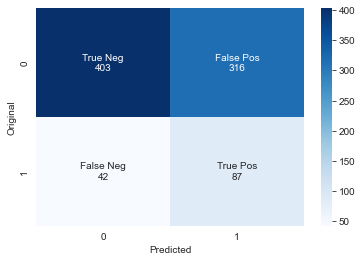

Recall Score on Dev Set: 0.7767835513565892
Recall Score on Test Set: 0.6744186046511628
{'algorithm__weights': [1.1, 0.8, 1.2]}


In [32]:
# We explicitly define the algorithms with their best hyperparameters to avoid going through the grid search again

best_svm = SVC(C=1e-6, gamma=0.01, probability=True)
best_knn = KNeighborsClassifier(n_neighbors=110)
best_ada = AdaBoostClassifier(n_estimators=100, learning_rate=1e-06)

classifiers = [
               ('algo_1', best_svm),
               ('algo_2', best_knn),
               ('algo_3', best_ada),
              ]

weights = [list(w) for w in itertools.permutations([1.2, 1.1, 1, 0.9, 0.8], 3)]

voting = train_model(VotingClassifier(
                    estimators=classifiers,
                    voting='soft',
                    ),
                    grid_params={'weights':weights}
                    )


evaluate_model(voting)

#### Lastly, since our model can give us the probabilities of its decisions we can change the default 0.5 threshold to some other number to improve the quality of our model

In [33]:
def plot_thresholds(model, title):
    
    global X_test, y_test
    
    recall_list = []
    f1_list = []
    precision_list = []
    
    
    for thresh in np.linspace(0, 1, 101):
        proba = model.predict_proba(X_test)
        proba = np.where(proba[:,0]>thresh, 0, 1)
        
        recall = recall_score(y_test, proba)
        f1 = f1_score(y_test, proba)
        precision = precision_score(y_test, proba)
        
        recall_list.append(recall)
        f1_list.append(f1)
        precision_list.append(precision)
    
    plt.plot(recall_list, label='Recall')
    plt.plot(f1_list, label='F1')
    plt.plot(precision_list, label='Precision')
    plt.legend()
    plt.title(title, fontsize=20)
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('Performance', fontsize=15)
    plt.show()

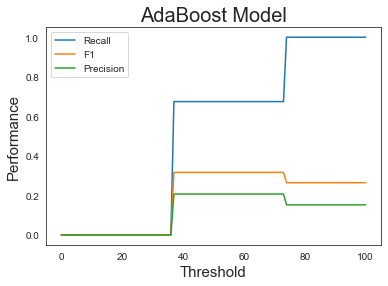

In [34]:
plot_thresholds(ada, 'AdaBoost Model')

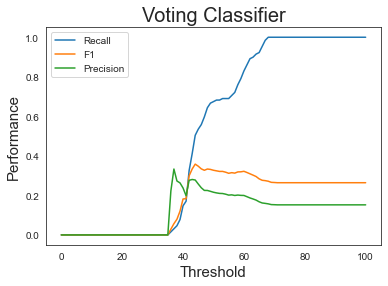

In [35]:
plot_thresholds(voting, 'Voting Classifier')

# Conclusion:

We can access more performance options if we use the voting classifier and adjust its threshold for our needs. There isn't a magical number to the threshold it all depends on how much do we care about Recall compared to F1 and Precision.